# 【課題】糖尿病の進行状況を予測（回帰）しよう

## データを読み込む

まずは、最初のセルを実行し、データを読み込んでください。今回はscikit-learnに標準で入っているデータを使います。

In [1]:
# scikit-learnの糖尿病のデータセットを読み込む（変更しないでください）
from sklearn import datasets
diabetes_data = datasets.load_diabetes()

読み込んだデータについて確認します。

In [2]:
# データセットのDESCRを確認する（変更しないでください）
print(diabetes_data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [3]:
# 読み込んだデータが何行何列かをshapeで確認する（変更しないでください）
print(diabetes_data.data.shape)
print(diabetes_data.target.shape)

(442, 10)
(442,)


このデータは、糖尿病患者に関する10種類のデータを持っています。主要なもののみ、以下に概要を記載します。

- `age`：年齢
- `sex`：性別
- `bmi`：身長と体重から計算されたBMI
- `bp`：血圧の平均

目的変数には、各患者の1年後の糖尿病の進行状況を数値化したものが入っています。

今回は `bmi`（BMI）と `bp`（血圧）を説明変数として採用します。スライスを使い、`diabetes_data` の `data` と `target` から、それぞれ `X` と `y` を作成しましょう。なお、今回はscikit-learnが持つデータを読み込んでいるので、データはndarray型です。一度Pandasに変更してからスライスでも良いですが、ここではndarrayのまま `data` からスライスしています。

In [4]:
# スライスして X と y を作成する（変更しないでください）
X = diabetes_data.data[:, 2:4]
y = diabetes_data.target

`X` の最初の10件を表示して、データがどのようになっているかを確認します。

In [5]:
# 特徴量（説明変数）の最初の10件をスライスして表示する
# （以下にコードを書いてください）
print(X[:10])

[[ 0.06169621  0.02187239]
 [-0.05147406 -0.02632753]
 [ 0.04445121 -0.00567042]
 [-0.01159501 -0.03665608]
 [-0.03638469  0.02187239]
 [-0.04069594 -0.01944183]
 [-0.04716281 -0.01599898]
 [-0.00189471  0.06662945]
 [ 0.06169621 -0.04009893]
 [ 0.03906215 -0.03321323]]


このデータは最初から正規化されているため、このような数値となっています。

`y` のデータも表示してみましょう。

In [6]:
# 目的変数の最初の10件をスライスして表示する
# （以下にコードを書いてください）
print(y[:10])

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310.]


`y`（糖尿病の進行状況）の数値がどのように計測、あるいは計算されたものかについての説明は公表されていませんが、数値が大きいほど、糖尿病が進行しているものと認識してください。

## データの前処理について

今回は、とくに何か前処理を行なう必要はありませんので、スキップして進めます。

## データを訓練データとテストデータに分ける

X および y を訓練データとテストデータに分けましょう。その際、訓練データ8割、テストデータ2割としてください。また、並び順がランダムになるよう、分割してください。

In [7]:
# 訓練データ8割、テストデータ2割に分割する
# （以下にコードを書いてください）
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, shuffle=True)

## モデルを作成して訓練する

ここでは、レッスン本文でも利用した「線形回帰モデル」（`LinearRegression`）を使います。また、作成したモデルに訓練データを渡して、学習を行ないます。

In [8]:
# LinearRegressionの線形回帰モデルを作成する
# （以下にコードを書いてください）
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# 訓練データを使って訓練を行なう
# （以下にコードを書いてください）
model.fit(X_train, y_train)

LinearRegression()

## 期待する性能が出たかを評価する

予測を実行しましょう。

In [9]:
# テストデータを使って予測（回帰）を実行する
# （以下にコードを書いてください）
# 予測結果を表示する
y_pred = model.predict(X_test)
print(y_pred)

[101.03359682 228.90035407 107.77532926  96.94240995 121.93858928
 108.51068441 170.05432353 148.35841591 182.15270711 155.56620044
 135.88810625 117.42841332  97.32283304 130.53145511 143.62405841
 116.62900114 152.9607764  113.70915252 182.99918229 118.64681458
 147.18513618 197.27356233 104.91104065 134.2422189  229.95207529
 110.90042392 187.2570492  142.36053563 204.44278086 214.36516798
 169.79351748 153.71506705  85.21595245 217.22945659  96.09593477
 231.81170569 182.73643476 122.62688142 134.56902345 131.33086728
 130.58701512 303.08098289  69.09043901 115.99626901 144.59209211
 231.55284111  88.56328716  87.3363889  177.65102815 176.59080993
 207.40119548 132.75451458 189.06111959 156.47673264  51.37459824
  96.30967782 113.39278645 279.2476448  246.77437788 116.84274419
 171.85839391 131.00600421 198.53902659 214.83971708 186.17983696
 171.70021088 147.45638072 180.5689353  142.84358173 198.51089908
 199.34693577 155.8355035  214.45929399 185.65822486  67.55567169
  59.12098

モデルの評価を行なううえで、まずは予測値と正解値の散布図を作ります。

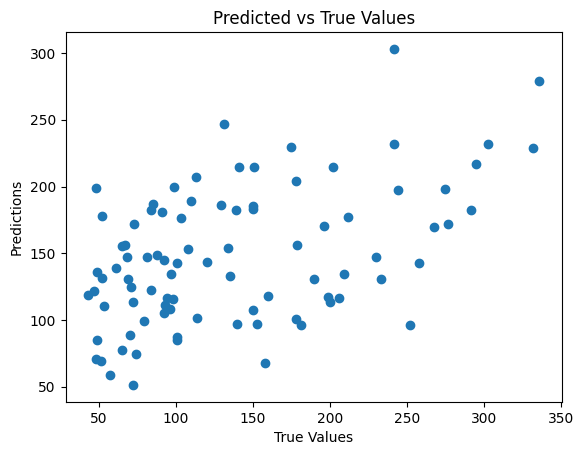

In [10]:
# 横軸が予測値、縦軸は正解値でプロットした散布図を表示する
# （以下にコードを書いてください）
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predicted vs True Values')
plt.show() 

正解値と予測値の平均二乗誤差を求めます。

In [11]:
# 正解値と予測値の平均二乗誤差を計算して表示する
# （以下にコードを書いてください）
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}') 

Mean Squared Error: 4703.652877955449


平均二乗誤差の平方根を計算し、正解値と予測値のズレの大きさを求めましょう。

In [12]:
# 平均二乗誤差の平方根を計算して表示する
# （以下にコードを書いてください）
rmse = mse ** 0.5
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 68.58318218014858
